# para hoy
Buscar entre los datasets que hemos desarrollado o uno externo en Kaggle, un problema que pueda ser abordado como regresión, y también tenga clasificación.  Desarrollar el ejercicio generar metricas (R2 y reporte de clasifiación), y conclusiones. Es importante que el ejercicio tenga una etapa de optimización.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Clasificación='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_2/Data/titanic.csv'
data_clas=pd.read_csv(Clasificación)

In [3]:
data_clas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_clas.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Llenando los nan de la edad con el promedio

In [6]:
data_clas.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
data_clas['Age'].fillna(29,inplace=True)
    

In [10]:
data_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data_clas.groupby(['Cabin'])[['Survived']].sum().reset_index().sort_values(by='Survived')

,Cabin,Survived
0,A10,0
45,B86,0
46,B94,0
52,C110,0
53,C111,0
...,...,...
103,D36,2
90,D,2
116,E101,3
142,F33,3


In [17]:
data_clas['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
dummie=pd.get_dummies(data=data_clas, columns = ["Sex",'Embarked'])
dummie.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [22]:
dummie_ready=dummie.drop(columns=['PassengerId','Name','Ticket','Cabin'])
dummie_ready.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Generando el regresor lineal

In [21]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [29]:
x = dummie_ready.drop(columns=['Survived']) # Separación de las características
y = dummie_ready['Survived'] # Separación del target (corresponde a lo que quiero predecir)

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=215)
#X_train=X_train.to_numpy().reshape(-1,1)
#X_test=X_test.to_numpy().reshape(-1,1)

In [30]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
lin_reg.fit(X_train,y_train) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_)

El bias calculado es 1.1419273029320371
La pendiente calculada es:  [-1.64465243e-01 -4.62768633e-03 -4.53617777e-02  1.53540979e-04
  1.63835290e-05  2.52611574e-01 -2.52611574e-01 -9.11448452e-02
 -8.93669064e-02 -1.83441690e-01]


In [31]:
y_pred=lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.42433347317965675

Generando el regresor infinito

In [61]:
r2=0
count=0
X = dummie_ready.drop(columns=['Survived']) # Separación de las características
y = dummie_ready['Survived'] # Separación del target (corresponde a lo que quiero predecir)
while (r2<=0.52):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.3737059027197315
0.40260158461282636
0.39580338994305153
0.4591489722441747
0.3282822237358013
0.36425966616970373
0.3795729361918342
0.45478527981441086
0.42900837803777436
0.3196994991689647
0.35503754955627553
0.34586561133243954
0.3050147156326096
0.3890349094654384
0.4756231678419811
0.34080149431200746
0.409064894595087
0.2799738825997161
0.37170749638848266
0.4537646676728494
0.3808257648368244
0.2743185813572796
0.3807539788368398
0.3519227146742069
0.3774497464667229
0.39059994404594833
0.4166711359979878
0.4374494381255276
0.4520643347534654
0.3749155814410037
0.3716465118879164
0.3739065462387102
0.3753301026330639
0.3682392375597029
0.3203572778240943
0.41039233847990997
0.4312003842374166
0.36639602219096035
0.3319976123327888
0.41275675473958273
0.35826126034287153
0.39928157897906413
0.4111098146695641
0.3983563093115271
0.39256637815543116
0.38652177494734674
0.3034329892139529
0.38822679516573355
0.2720969102028168
0.38875039384307575
0.411950354003473
0.381138820214

Ahora con un KNN regression

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
r2=0
count=0
X = dummie_ready.drop(columns=['Survived']) # Separación de las características
y = dummie_ready['Survived'] # Separación del target (corresponde a lo que quiero predecir)
while (r2<=0.58):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.4832216725073867
0.34141149245303304
0.3680420444039686
0.38868725868725873
0.43716397144674923
0.3445082011584474
0.48355845478575066
0.39013261870404703
0.45821185617103977
0.32845633202776037
0.374146129650615
0.42986707499159904
0.37802967315801494
0.43515704154002044
0.4235374149659864
0.4410678607107178
0.3083268983268982
0.3698587127158556
0.32227028742531494
0.4487068010161458
0.40878458285234187
0.3635621202009206
0.3900934286758181
0.35070209617493364
0.39084874394847424
0.4520826493545007
0.39894411319276035
0.47831676560469283
0.4094924926492335
0.39612470421122425
0.40051858833829346
0.3595822345544344
0.3764207821887233
0.42326295649838874
0.4843268242548816
0.2664336967663776
0.3878744480248242
0.3136001302575011
0.413429164769356
0.4109653704001287
0.50619426656293
0.43083146301999053
0.40598192000335587
0.49892328493410865
0.4261495790795289
0.39974550971467704
0.38824317455829427
0.4316074255789272
0.41706854600056986
0.4981491766968983
0.38078187796857865
0.4785037

Clasificando

In [62]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

In [64]:
from sklearn.metrics import classification_report

Accuracy: 0.7985074626865671
Accuracy: 0.8059701492537313
Accuracy: 0.832089552238806
Accuracy: 0.8059701492537313
Accuracy: 0.8246268656716418
Accuracy: 0.7947761194029851
Accuracy: 0.7910447761194029
Accuracy: 0.7761194029850746
Accuracy: 0.8134328358208955
Accuracy: 0.8208955223880597
Accuracy: 0.8171641791044776
Accuracy: 0.7835820895522388
Accuracy: 0.8134328358208955
Accuracy: 0.7835820895522388
Accuracy: 0.7798507462686567
Accuracy: 0.8208955223880597
Accuracy: 0.835820895522388
Accuracy: 0.8395522388059702
Accuracy: 0.7835820895522388
Accuracy: 0.835820895522388
Accuracy: 0.7649253731343284
Accuracy: 0.7873134328358209
Accuracy: 0.8470149253731343
23


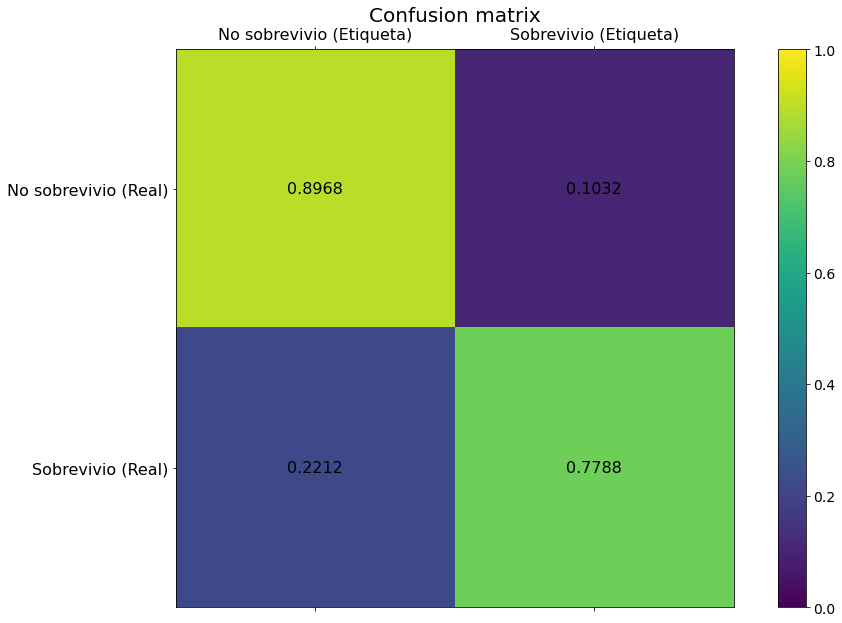

               precision    recall  f1-score   support

No sobrevivio       0.85      0.90      0.87       155
   Sobrevivio       0.85      0.78      0.81       113

     accuracy                           0.85       268
    macro avg       0.85      0.84      0.84       268
 weighted avg       0.85      0.85      0.85       268



In [89]:
X = dummie_ready.drop(columns=['Survived']) # Separación de las características
y = dummie_ready['Survived'] # Separación del target (corresponde a lo que quiero predecir)
accuracy=0
count=0
while (accuracy<=0.84):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train) 
    predictions = knn.predict(X_test)
    accuracy=knn.score(X_test, y_test)
    count+=1
#print(predictions.tolist())
#print(y_test.tolist())
    print('Accuracy:',knn.score(X_test, y_test))
print(count)
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['No sobrevivio','Sobrevivio'])
print(classification_report(y_test,predictions , target_names=['No sobrevivio','Sobrevivio']))